8.0
6.0
8
6
[[1715  113   42]
 [ 330  242   42]
 [ 138   56  250]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.59      0.39      0.47       614
    positive       0.75      0.56      0.64       444

    accuracy                           0.75      2928
   macro avg       0.71      0.62      0.65      2928
weighted avg       0.74      0.75      0.74      2928

0.7537568306010929


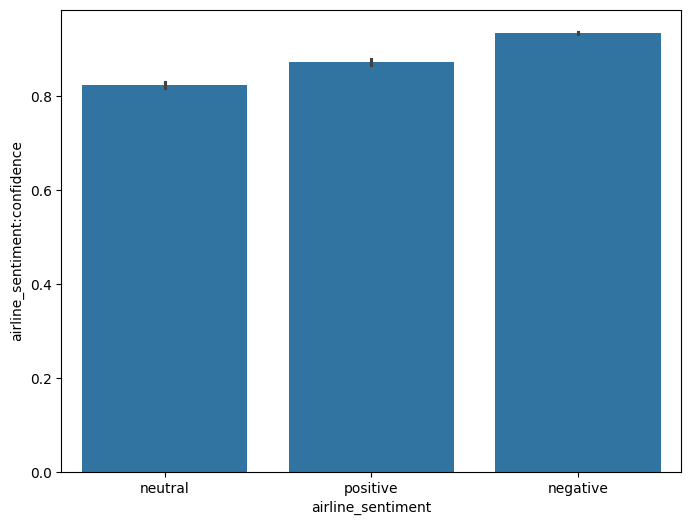

In [54]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

data_source_path = 'd:/Neural Networks/Mood Analysis/airline.csv'

airline_tweets = pd.read_csv(data_source_path, encoding='latin1')

# print(airline_tweets.head())

plot_size = plt.rcParams["figure.figsize"]
print(plot_size[0])
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

print(plot_size[0])
print(plot_size[1])

# airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

# airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['red', 'green', 'blue'])

# airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()

# airline_sentiment.plot(kind='bar')

import seaborn as sns

sns.barplot(x='airline_sentiment', y='airline_sentiment:confidence', data=airline_tweets)

features = airline_tweets.iloc[:, 14].values
labels = airline_tweets.iloc[:, 5].values


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

processed_features = []

for sentence in range(0, len(features)):
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    processed_feature = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    processed_feature = re.sub(r'^b\s+', ' ', processed_feature)

    processed_feature = processed_feature.lower()

    words = word_tokenize(processed_feature)

    processed_feature = ' '.join(word.lower() for word in words if word.lower() not in stop_words)


    processed_features.append(processed_feature)


from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8)
processed_features = vectorizer.fit_transform(processed_features).toarray()

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(x_train, y_train)

predictions = text_classifier.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))